<a href="https://colab.research.google.com/github/dipankarsahu1000/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Yes Bank Stock Closing Price Prediction



##### **By** - Dipankar Sahu 
##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/dipankarsahu1000

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [264]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime

### Dataset Loading

In [265]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [266]:
path = '/content/drive/MyDrive/Almabetter: Full Stack Data Science/Projects/Supervised ML - Regression/Yes Bank Stock Closing Price Prediction/Datasets/data_YesBank_StockPrices.csv'
df = pd.read_csv(path)

### Dataset First View

In [267]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [268]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [269]:
# Dataset Rows & Columns count
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 185 rows and 5 columns.


### Dataset Information

In [270]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [271]:
# Dataset Duplicate Value Count
dup_count = df.duplicated().sum()
print(f"The dataset contains {dup_count} duplicate values.")

The dataset contains 0 duplicate values.


#### Missing Values/Null Values

In [272]:
# Missing Values/Null Values Count
null_count = df.isnull().sum().sum()
print(f"The dataset contains {null_count} null values values.")

The dataset contains 0 null values values.


In [273]:
# Visualizing the missing values
'''As there are absolutely zero missing values in our dataset, there is no need for visualising the missing values.'''

'As there are absolutely zero missing values in our dataset, there is no need for visualising the missing values.'

### What did you know about your dataset?

* The dataset contains 185 rows and 5 columns.
* There are aboslutely no duplicate values in our dataset. 
* There are zero null/missing values.

## ***2. Understanding Your Variables***

In [274]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [275]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

We have the dataset which contains the details of the stock prices of Yes Bank from July 2005 to November 2020. The variables in the dataset are:

* Date: The date (the month and the year, in this case) in which we are observing the stock prices.

* Open: The price at which the first trade occured at the beginning of the session (the month of the year, in this case).

* High: The maximum trading price reached by the stock during the session.

* Low: The minimum trading price reached by the stock during the session.

* Close: The final price at which the stock traded at the end of the session. 

### Check Unique Values for each variable.

In [276]:
# Check Unique Values for each variable.

for variable in df.columns:
  print(f"The unique values for the '{variable}' variable are:\n\n {df[variable].unique()}\n\n")

The unique values for the 'Date' variable are:

 ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 '

## 3. ***Data Wrangling***

### Data Wrangling Code

In [277]:
# Saving a copy of the original dataframe
og_df = df.copy()

In [278]:
# Checking the exact datatype of the entries under the 'Date' column
type(df['Date'][0])

str

In [279]:
# Parsing the string objects under the 'Date' column to datetime objects
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [280]:
# Setting the 'Date' column as the index
df = df.set_index('Date')

In [281]:
# Checking the dataset
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [282]:
dependent_variable = ['Close']
independent_variables = list(df.columns[:-1])

### What all manipulations have you done and insights you found?

* As there were no null values, no duplicate rows and all the variables seemed to be of the appropriate data types, there was really not much data wrangling required here. 

* Only the 'Date' column's entries were converted from string objects to datetime objects and then the 'Date' column was set as the index.

* The independent variables and the dependent variable were separated out.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Candlestick Chart - Describing the Price Movements

In [283]:
fig = go.Figure(go.Candlestick(x = df.index, open = df['Open'], high = df['High'], low = df['Low'], close = df['Close']))
fig.update_layout(title = {'text': 'Describing the Price Movements', 'x': 0.5, 'y': 0.9})
fig.show()

Note: The price variation between the Open and Close price is depicted as the 
thicker part of the candlestick called the *real body*, and the price variations below and above the real body are represented as thin lines called the *wicks*. The upper wick represents the High price and the lower wick represents the Low price. When the Close price is higher than the Open price, then the candlesticks is green. And when the Close price is lower than the Open price, the candlestick is red.

##### 1. Why did you pick the specific chart?

* Candlestick chart is a type of financial chart that is specially used to describe the open, high, low, close values over a range of time. As a stock data is being analysed here, a candlestick chart is pretty useful here.


* As the candestick chart is interactive, one can get the details of each part by just hovering the cursor on that part. Also, the horizontal range of the chart can also be adjusted with the help of the rangeslider provided just below the chart.

##### 2. What is/are the insight(s) found from the chart?

* Gives us an overall idea on how the stock prices vary over the years.
* It can be observed that the stock price were rising upto the year of 2018 and after that it basically started its sharp decline. 2018 was the year when the fraud case involving Rana Kapoor came into light.


#### Chart - 2: Line Plot - Variations in Each Feature over the Years

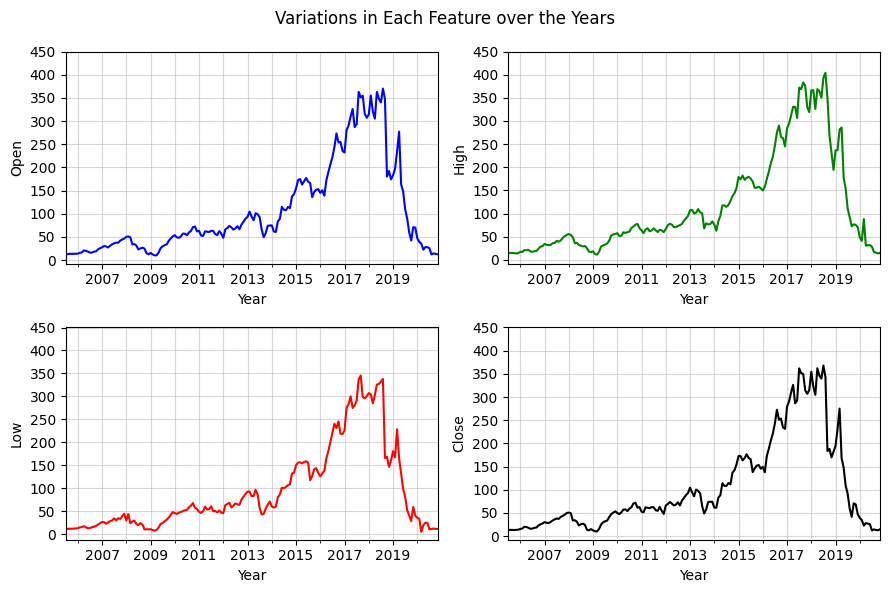

In [284]:
plt.figure(figsize = (9, 6))
plt.suptitle('Variations in Each Feature over the Years')

for i in range(len(df.columns)):
  color_list = ['blue', 'green', 'red', 'black']
  plt.subplot(2, 2, i + 1)
  df[df.columns[i]].plot(color = color_list[i])
  plt.yticks(range(0 , 500, 50))
  plt.grid(which = 'major', alpha = 0.5)
  plt.grid(which = 'minor', alpha = 0.5)
  plt.xlabel('Year')
  plt.ylabel(f'{df.columns[i]}')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

* To know how the Open, High, Low, Close price variables individually change over the years.

##### 2. What is/are the insight(s) found from the chart?

* As expected, the dip in the price variables after 2018 can easily be observed.


#### Chart - 3: Histogram and KDE Plot - Overall Distribution of Each Variable

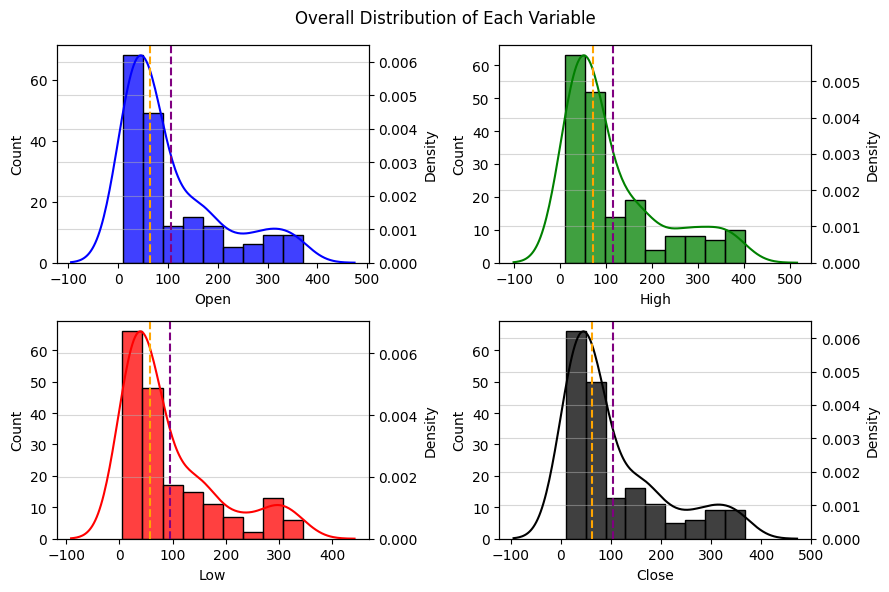

In [285]:
plt.figure(figsize = (9, 6))
plt.suptitle('Overall Distribution of Each Variable')

for i in range(len(df.columns)):
  
  color_list = ['blue', 'green', 'red', 'black']

  plt.subplot(2, 2, i + 1)
  ax1 = plt.gca()
  sns.histplot(df[df.columns[i]], color = color_list[i], ax = ax1)
  ax2 = ax1.twinx()
  sns.kdeplot(df[df.columns[i]], color = color_list[i], ax = ax2)   # Overlapping the KDE plot on the histogram.
  
  plt.grid(which = 'major', alpha = 0.5)
  plt.grid(which = 'minor', alpha = 0.5)
  plt.axvline(df[df.columns[i]].mean(), color = 'purple', linestyle = 'dashed', linewidth = 1.5)                           
  plt.axvline(df[df.columns[i]].median(), color = 'orange', linestyle = 'dashed', linewidth=1.5)

plt.tight_layout()


##### 1. Why did you pick the specific chart?

* To check how the overall data within the Open, High, Low, Close columns are distributed.

##### 2. What is/are the insight(s) found from the chart?

* All these four distributions are positively skewed.

#### Chart - 4: Boxplots: Studying the Outliers

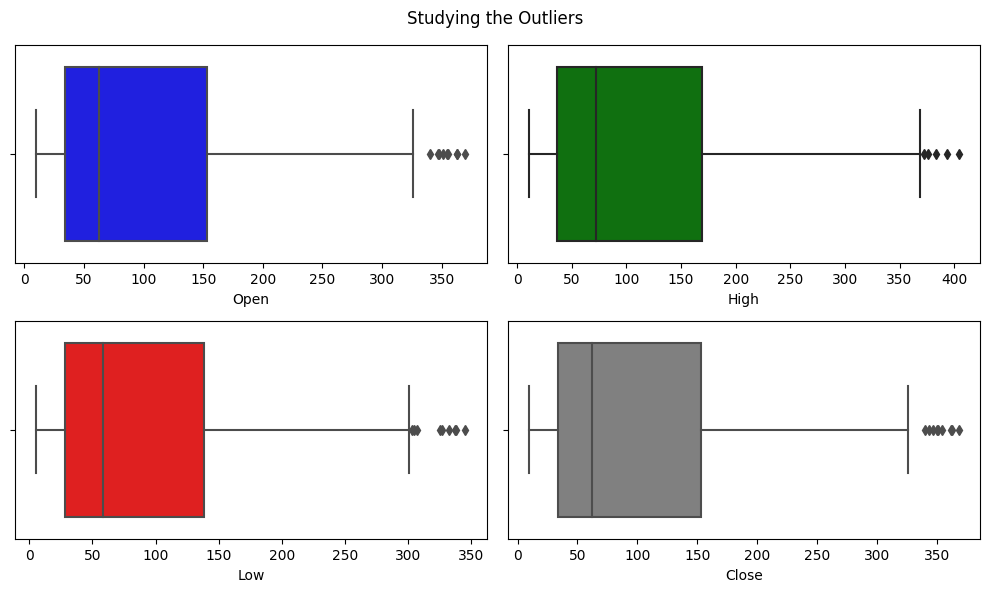

In [286]:
plt.figure(figsize = (10, 6))
plt.suptitle('Studying the Outliers')

for i in range(len(df.columns)):
  color_list = ['blue', 'green', 'red', 'grey']
  plt.subplot(2, 2, i + 1)
  sns.boxplot(x = df[df.columns[i]], color = color_list[i])

plt.tight_layout()


##### 1. Why did you pick the specific chart?

* To study the outliers present in each feature.

##### 2. What is/are the insight(s) found from the chart?

* There are some outliers present in each of the features which will be taken care of before proceeding to the model fitting.

#### Chart - 5: Regression Plot - Studying the Correletation between the Independent and Dependent Variables

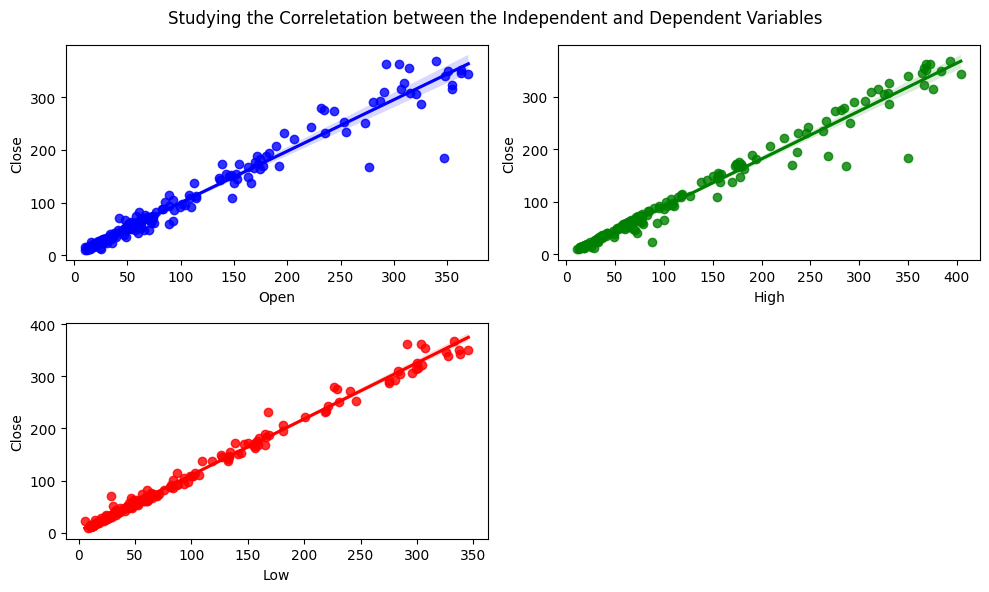

In [287]:
plt.figure(figsize = (10, 6))
plt.suptitle('Studying the Correletation between the Independent and Dependent Variables')
for i in range(len(df.columns) - 1):
  color_list = ['blue', 'green', 'red']
  plt.subplot(2, 2, i + 1)
  sns.regplot(x = df[df.columns[i]], y = df['Close'], color = color_list[i])

plt.tight_layout()

##### 1. Why did you pick the specific chart?

* To study the correlation between the indepdent variables (Open, High, Low) and the dependent variable (Close).

##### 2. What is/are the insight(s) found from the chart?

* The independent variables are highly correlated with the dependent variable.

#### Chart - 6 - Correlation Heatmap

<Axes: >

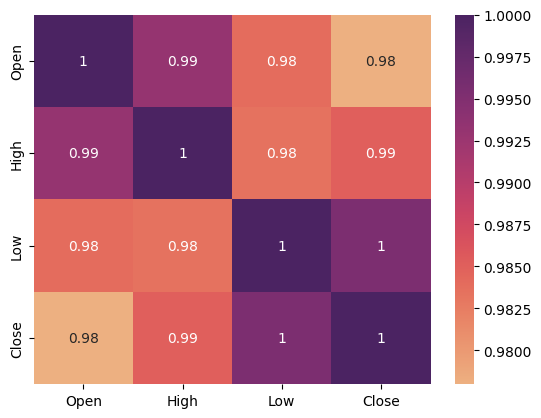

In [288]:
sns.heatmap(df.corr(), annot = True, cmap = 'flare')

##### 1. Why did you pick the specific chart?

* To dig deeper into how the variables are correlated to each other.

##### 2. What is/are the insight(s) found from the chart?

* As seen earlier the independent variables (Open, High and Low) have a very high correlation with the dependent variable (Class), which is a desirable characteristic in the dataset.

* The independent variables (Open, High and Low) have a very high correlation among themselves, which is a case of multicollinearity. Multicollinearity can be problematic for the regression models. This is to be fixed in the Data Pre-processing part.

#### Chart - 7 - Pair Plot 

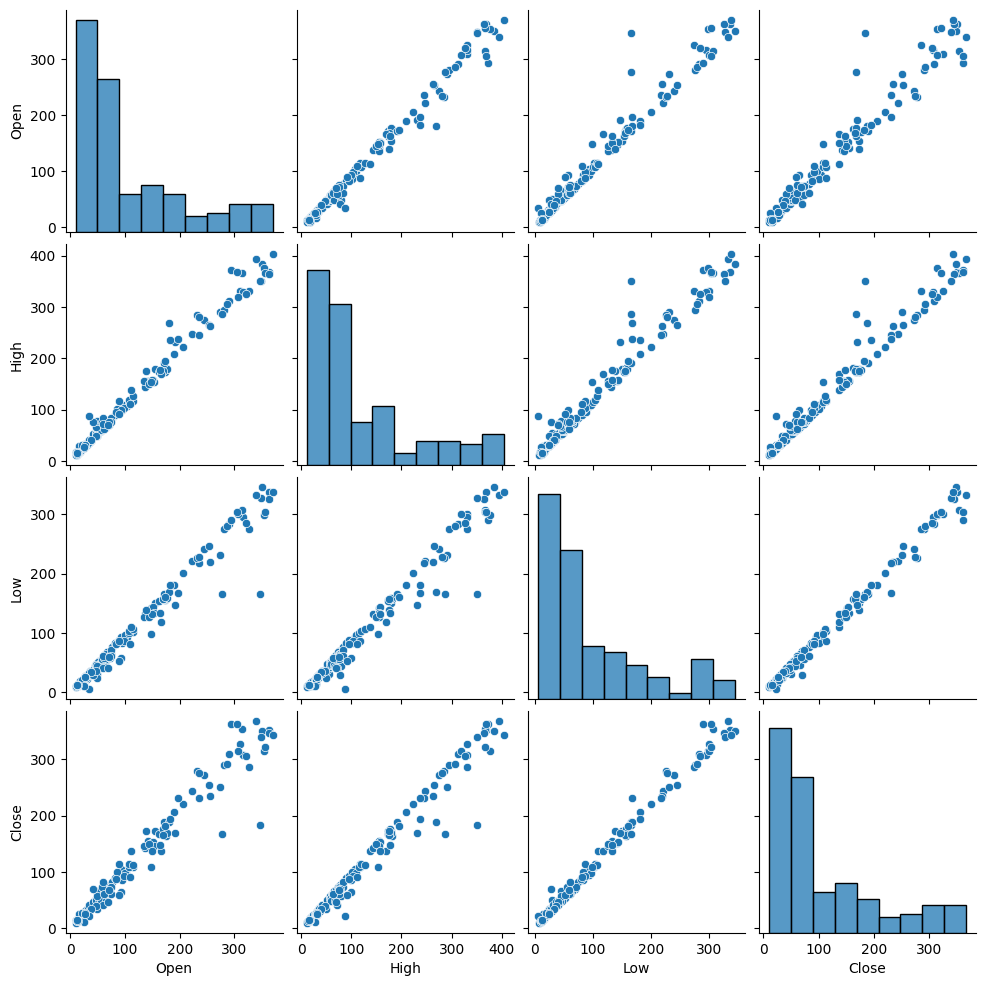

In [289]:
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

* To get an overall summary of the relationships between the variables.

##### 2. What is/are the insight(s) found from the chart?

As seen earlier: 
* The Open, High and Low variables highly correlated with the Close variable.
* The Open, High and Low variables are also highly correlated with each other.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* Hypothetical Statement - 1: The distribution of the features are not normal.

* Hypothetical Statement - 2: The features are correlated.

* Hypothetical Statement - 3: The distribution of all the features are identical.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis H<sub>0</sub> : The distribution of the features are normal.

* Alternate Hypothesis H<sub>A</sub> :  The distribution of the features are NOT normal.

#### 2. Perform an appropriate statistical test.

In [290]:
from scipy.stats import shapiro

for i in range(len(df.columns)):

  # Implementing the Shapiro-Wilk test to check for the normality of the features of the dataset.

  p = shapiro(df[df.columns[i]])[1]

  
  # The significance level is 5% or 0.05. If the p-value is less than 0.05, then reject the null hypothesis. Otherwise, accept the null hypothesis.

  if p < 0.05: 
    print(f'The distribution of {df.columns[i]} feature is NOT normally distributed (Null Hypothesis Rejected).')  # Null hypothesis rejected. Alternate Hypothesis accepted.
  else:
    print(f'The distribution of {df.columns[i]} feature is normally distributed (Null Hypothesis Accepted).') # Null hypothesis accepted.

print(f'\n(The p-value is: {p})')

The distribution of Open feature is NOT normally distributed (Null Hypothesis Rejected).
The distribution of High feature is NOT normally distributed (Null Hypothesis Rejected).
The distribution of Low feature is NOT normally distributed (Null Hypothesis Rejected).
The distribution of Close feature is NOT normally distributed (Null Hypothesis Rejected).

(The p-value is: 5.694285375255209e-14)


##### Which statistical test have you done to obtain P-Value?

* **Shapiro-Wilk Test**

##### Why did you choose the specific statistical test?

* Shapiro-Wilk is a statistical test commonly used to check if the data is from a normal distribution.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis H<sub>0</sub> : The selected two features are NOT correlated (i.e. independent).

* Alternate Hypothesis H<sub>A</sub> :  The selected two features are correlated (i.e. dependent).

#### 2. Perform an appropriate statistical test.

In [291]:
from scipy.stats import spearmanr

for i in range(len(df.columns)):
  for j in range(i, len(df.columns)):
    if df.columns[i] != df.columns[j]:

      # Implementing the Spearman's Rank Correlation to check for the correlation between the two selected features.

      p = spearmanr(df[df.columns[i]], df[df.columns[j]])[1]

      # The significance level is 5% or 0.05. If the p-value is less than 0.05, then reject the null hypothesis. Otherwise, accept the null hypothesis.

      if p < 0.05:
        print(f"The {df.columns[i]} feature and the {df.columns[j]} feature are correlated to each other, i.e. dependent (Null Hypothesis Rejected).")  # Null hypothesis rejected. Alternate hypothesis accepted.
      else:
         print(f"The {df.columns[i]} feature and the {df.columns[j]} feature are NOT correlated to each other, i.e. independent (Null Hypothesis Accepted).") # Null hypothesis accepted.

print(f'\n(The p-value is: {p})')

The Open feature and the High feature are correlated to each other, i.e. dependent (Null Hypothesis Rejected).
The Open feature and the Low feature are correlated to each other, i.e. dependent (Null Hypothesis Rejected).
The Open feature and the Close feature are correlated to each other, i.e. dependent (Null Hypothesis Rejected).
The High feature and the Low feature are correlated to each other, i.e. dependent (Null Hypothesis Rejected).
The High feature and the Close feature are correlated to each other, i.e. dependent (Null Hypothesis Rejected).
The Low feature and the Close feature are correlated to each other, i.e. dependent (Null Hypothesis Rejected).

(The p-value is: 6.2082299467155e-162)


##### Which statistical test have you done to obtain P-Value?

* **Spearman's Rank Correlation**

##### Why did you choose the specific statistical test?

* Spearman's Rank Correlation is used to test whether there is a correlation between two variables.
* Also Spearman's Rank Correlation is a non-parametric test, i.e. it doesn't make any assumption regarding the distribution of the underlying population. As the features are discovered to be not normally distributed and no other information regarding their underlying distribution is known, it is better to use this non-parametric test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis H<sub>0</sub> : The distribution of all the features are identical.

* Alternate Hypothesis H<sub>A</sub> : The distribution of atleast one feature differs from the other features.


#### 2. Perform an appropriate statistical test.

In [292]:
from scipy.stats import kruskal

# Implementing the Kruskal-Wallis test to check for the similarity in the distribution of the features by determing their statistical difference between their medians.

p = kruskal(df['Open'], df['High'], df['Low'], df['Close'])[1]
 
# The significance level is 5% or 0.05. If the p-value is less than 0.05, then reject the null hypothesis. Otherwise, accept the null hypothesis.

if p < 0.05: 
  print('The distribution of atleast one feature differs from the other features (Null Hypothesis Rejected).')  # Null hypothesis rejected. Alternate Hypothesis accepted.
else:
  print('The distribution of all the features are identical (Null Hypothesis Accepted).') # Null hypothesis accepted.

print(f'\n(The p-value is: {p})')

The distribution of all the features are identical (Null Hypothesis Accepted).

(The p-value is: 0.08105279249329321)


##### Which statistical test have you done to obtain P-Value?

* **Kruskal-Wallis Test**

##### Why did you choose the specific statistical test?

* Kruskal-Wallis Test is especially used to check whether the the samples originate from the same population by assessing whether there is any significant difference between the medians of the samples.
* Also Kruskal-Wallis Test is a non-parametric test, i.e. it doesn't make any assumption regarding the distribution of the underlying population. As the features are discovered to be not normally distributed and no other information regarding their underlying distribution is known, it is better to use this non-parametric test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

As we have checked earlier, there were no missing values in the dataset. So no need for any missing values imputation techniques.

### 2. Handling Outliers

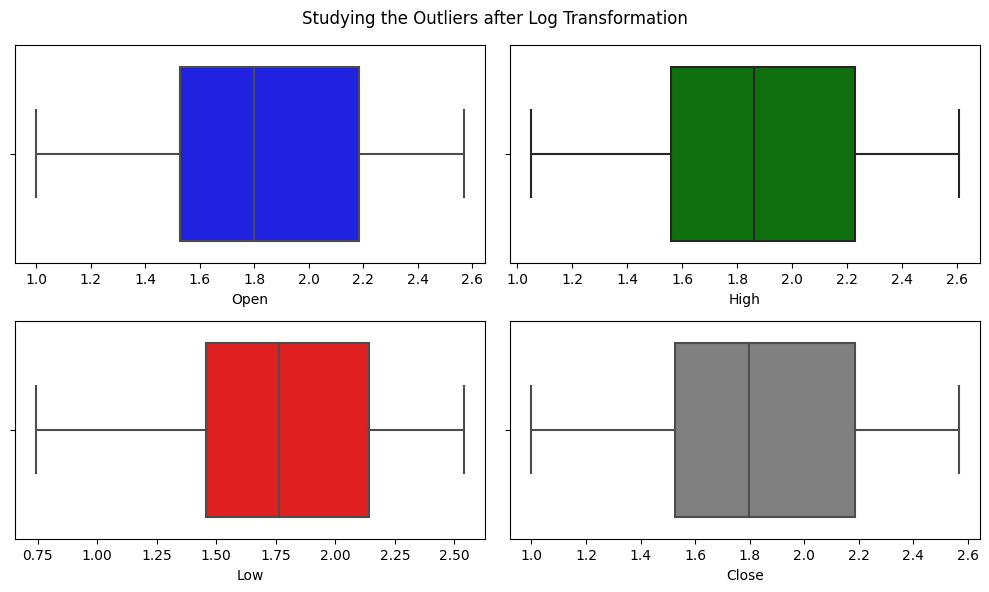

In [293]:
# Handling Outliers & Outlier treatments

plt.figure(figsize = (10, 6))
plt.suptitle('Studying the Outliers after Log Transformation')

for i in range(len(df.columns)):
  color_list = ['blue', 'green', 'red', 'grey']
  plt.subplot(2, 2, i + 1)
  sns.boxplot(x = np.log10(df[df.columns[i]]), color = color_list[i])   # Using log transformation on the feature.

plt.tight_layout()
  

As can be seen above, after the log transformation of the features. No outliers remain.

##### What all outlier treatment techniques have you used and why did you use those techniques?

* Log transformation was used for outlier treatment. (Also log transformation is going to be used later to take care of the skewness in the features' distribution, so it is like solving two problems with one solution)

### 3. Categorical Encoding

There are only numerical features in our dataset. So, no need for any categorical encoding.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [294]:
# First, checking the Variance Inflation Factor for each feature.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe to store the vif for each of the features.
vif_df = pd.DataFrame()   

vif_df['Features'] = list(df.columns)[:-1]

vif_df['VIF'] = [variance_inflation_factor(df.iloc[:, :-1], i) for i in range(len(df.iloc[:, :-1].columns))]

vif_df

,Features,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


The VIFs for all the features are on the higher side. But as the data is small having only 3 independent variable and that too of the numerical type, so there is not much scope of any feature manipulation which may prove useful. 

#### 2. Feature Selection

As the dataset is already very small, any kind of feature selection is senseless.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

The data needs to be transformed because the distribution of the features are skewed and we need to transform them as close to normal distribution as possible. So, a log transformation is going to be implemented. As seen earlier, it would be also helpful in taking care of the outliers.

In [295]:
# Transform Your data

for i in range(len(df.columns)):
  df[df.columns[i]] = np.log10(df[df.columns[i]])

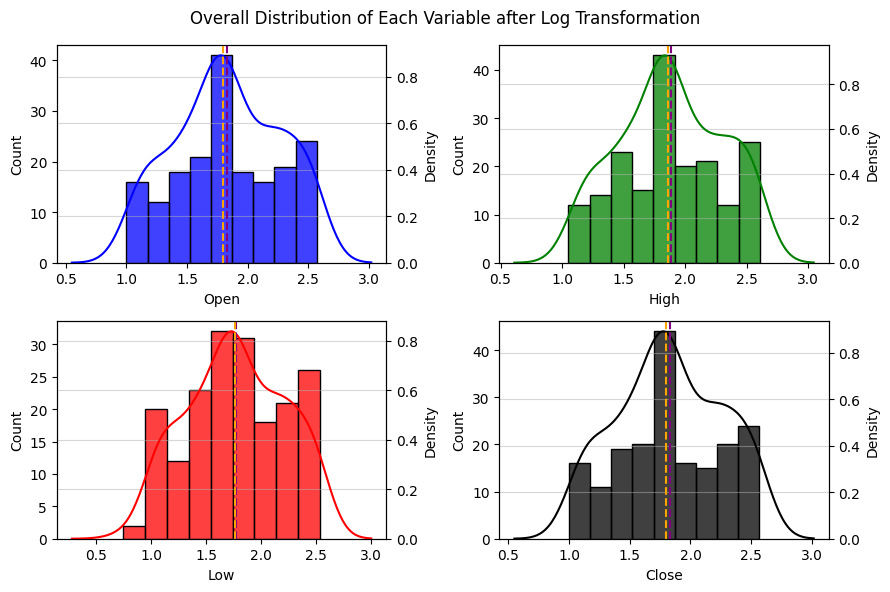

In [296]:
# Checking the distributions of the features again:

plt.figure(figsize = (9, 6))
plt.suptitle('Overall Distribution of Each Variable after Log Transformation')

for i in range(len(df.columns)):
  
  color_list = ['blue', 'green', 'red', 'black']

  plt.subplot(2, 2, i + 1)
  ax1 = plt.gca()
  sns.histplot(df[df.columns[i]], color = color_list[i], ax = ax1)
  ax2 = ax1.twinx()
  sns.kdeplot(df[df.columns[i]], color = color_list[i], ax = ax2)   # Overlapping the KDE plot on the histogram.
  
  plt.grid(which = 'major', alpha = 0.5)
  plt.grid(which = 'minor', alpha = 0.5)
  plt.axvline(df[df.columns[i]].mean(), color = 'purple', linestyle = 'dashed', linewidth = 1.5)                           
  plt.axvline(df[df.columns[i]].median(), color = 'orange', linestyle = 'dashed', linewidth=1.5)

plt.tight_layout()

* Now, it can be seen that the distributions are a bit closer to a normal distribution. The mean (purple vertical line) and the median (the yellow vertical line) are almost equal in all the cases.

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

* Dimensionality reduction is not needed because the dataset is already too small.

### 7. Data Splitting

In [297]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

X = df[independent_variables]
y = df[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##### What data splitting ratio have you used and why? 

* An 80:20 split ratio is being used. As we are working on a small dataset, more data may be needed for training the model.

### 8. Data Scaling

In [298]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [299]:
# Checking the training dataset
X_train[0: 10]

array([[ 0.83311596,  0.8243388 ,  0.88445745],
       [-1.41735108, -1.31675483, -1.23862182],
       [ 0.3871812 ,  0.35973888,  0.04241403],
       [-0.06900104,  0.01215654, -0.30051561],
       [-1.91321118, -1.50865163, -1.71568543],
       [-0.2660071 ,  0.10246554, -0.21069831],
       [-0.29592654, -0.34290717, -0.15641974],
       [-0.59033534, -0.59737272, -0.45688014],
       [-0.24949754, -0.27329508, -0.60357017],
       [-0.94310352, -0.99502356, -1.60535529]])

In [300]:
# Checking the test dataset
X_test[0: 10]

array([[-0.65205247, -0.74351467, -0.66245523],
       [ 0.90986063,  0.82102055,  0.88229187],
       [ 0.0994373 , -0.01850911, -0.30663666],
       [ 0.7961367 ,  0.74491569,  0.87275245],
       [-0.07074439, -0.04337995,  0.06468081],
       [-0.8726779 , -0.79368304, -0.71684963],
       [ 1.35640166,  1.3141555 ,  1.37204697],
       [-1.46313114, -1.54216502, -1.27807511],
       [-1.60708132, -1.71488829, -1.44741967],
       [ 1.09458045,  1.27547366,  1.18581212]])

##### Which method have you used to scale you data and why?

* Standard scaler is used here, as we would be mainly dealing with linear regression which assumes normally distributed features.

## ***7. ML Model Implementation***

### ML Model - 1: Linear Regression

In [301]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

# Fit the Algorithm
linear_reg.fit(X_train, y_train)

LinearRegression()

In [302]:
# Predict on the model
y_pred = linear_reg.predict(X_test)

In [303]:
# Checking the model parameters
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)

Coefficients: [[-0.22992597  0.33533242  0.31585415]]
Intercept: [1.79986471]


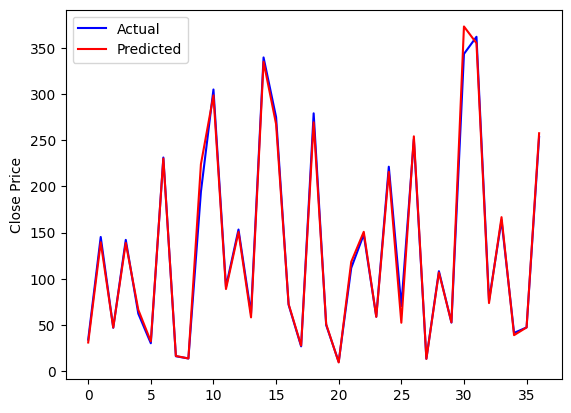

In [304]:
# Comparing the actual Close price and the predicted Close price by plotting them
plt.plot(np.array(10**y_test), color = 'blue')
plt.plot(10**y_pred, color = 'red')
plt.ylabel("Close Price")
plt.legend(["Actual", "Predicted"])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Mean Squared Error
mse_lin = round( mean_squared_error((10**y_test), 10**(y_pred)), 4)

# Root Mean Squared Error
rmse_lin = round(np.sqrt(mse_lin), 4)

# Mean Absolute Error
mae_lin = round(mean_absolute_error((10**y_test), 10**(y_pred)), 4)

# R-2 Score
r2_lin = round(r2_score((10**y_test), (10**y_pred)), 4)

# Adjusted R-2 Score
adj_r2_lin = round(1 - (1 - r2_lin)*((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)), 4)


In [309]:
# Creating a dataframe to store all the evaluation metrics
evametdf_lin = pd.DataFrame()
evametdf_lin['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']
evametdf_lin['Linear Regression'] = [70.4204, 8.3917, 4.8168, 0.9937, 0.9931]
evametdf_lin

,Metrics,Linear Regression
0,Mean Squared Error,70.4204
1,Root Mean Squared Error,8.3917
2,Mean Absolute Error,4.8168
3,R-2 Score,0.9937
4,Adjusted R-2 Score,0.9931


#### 2. Cross- Validation & Hyperparameter Tuning

In [42]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [43]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [44]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [45]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [46]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [47]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [48]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [49]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***